# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as spstat
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

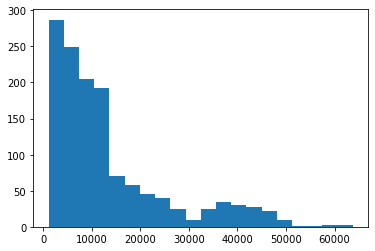

In [5]:
holder = plt.hist(medical['charges'],bins=20)

In [7]:
charges_mean = np.mean(medical['charges'])
charges_stdev = np.std(medical['charges'], ddof=1)
print(f'The sample mean is: {charges_mean}')
print(f'The sample standard deviation is: {charges_stdev}')

The sample mean is: 13270.422265141257
The sample standard deviation is: 12110.011236693994


The sample mean and standard deviation may be misleading in the case of this analysis due to how skewed the data is. In particuar, we see that there is a substantial right-hand tail for the distribution. We may need to consider what will be a more appropriate analysis.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

If we trust that the sample collected is truly representative of the underlying population, then it would fulfill the assumption that our sample is a valid & reliable measure of our population. If a sample is representative of the population, then we can have confidence that the sample statistics we calculate will be representative of the population parameter.

In this case, I would probably conduct a one-sided z-test given that we have a relatively large sample size and the question is whether the charges have fallen *below* 12,000 (instead of simply wondering if the charges have *deviated* from 12,000)

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ I would probably go with a one-sided test in this instance due to the nature of the question. We are trying to figure out if charges have fallen *below* a specific value as opposed to simply *being different* than a value. If the administrator was simply concerned that the average had *changed*, I would most likely do a two-sided test instead.

In [8]:
# First, let's calculate the standard error of our sample so we can begin to create our 95% CIL
charges_SE = charges_stdev / np.sqrt(len(medical['charges']))
print(f'Our charges Standard Error is: {charges_SE}')

Our charges Standard Error is: 331.06745431568226


In [13]:
# Next, we need to know what is the appropriate t-stat for a one-sided CI test that tests a lower-bound.
print(t.ppf(0.05,df=(len(medical['charges'])-1)))

-1.6459941145571324


In [17]:
#From here we can calculate our margin of error and then our CIL 95%
#Calculate Margin of Error
charges_MoE = charges_SE * t.ppf(0.05,df=(len(medical['charges'])-1))
print(charges_MoE)

#Calculate the Confidence Interval
charges_CI95L = charges_mean + charges_MoE #Adding a negative and the upper is just infinite

#Present the CI95%L
print(f'The one-sided 95% confidence interval is [{charges_CI95L}, infinite]')

-544.9350813250253
The one-sided 95% confidence interval is [12725.48718381623, infinite]


At least based on this sample, we are 95% confident that the average charge for patients *has not fallen below 12,000* as the 95% CIL does not go below 12,000

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Our Null and Alternative Hypotheses will be as follows:  
* Null Hypothesis: Mean(Insurance) == Mean(No Insurance)  
* Alternative Hypothesis: Mean(Insurance) =/= Mean(No Insurance)

In essence, we will be seeing if the t-statistic is large enough for this test to reject the null hypothesis

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [18]:
#First we need to know the stats for each group. Let's start with insurance
medical_insurance = medical.loc[medical['insuranceclaim'] == 1]
medical_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [37]:
#Next let's collect all the approrpriate stats from this group
medical_insurance_mean = np.mean(medical_insurance['charges'])
medical_insurance_stdev = np.std(medical_insurance['charges'], ddof = 1)
medical_insurance_n = len(medical_insurance['charges'])

print(f'The sample mean for the insurance group charges is: {medical_insurance_mean}')
print(f'The sample stdev for the insurance group charges is: {medical_insurance_stdev}')
print(f'The sample size for the insurance group charges is: {medical_insurance_n}')

The sample mean for the insurance group charges is: 16423.928276537663
The sample stdev for the insurance group charges is: 14045.928418802127
The sample size for the insurance group charges is: 783


In [20]:
#Second, we need to know the stats for the no insurance group
medical_noIns = medical.loc[medical['insuranceclaim'] == 0]
medical_noIns.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [36]:
#Next let's collect all the approrpriate stats from this group
medical_noIns_mean = np.mean(medical_noIns['charges'])
medical_noIns_stdev = np.std(medical_noIns['charges'], ddof = 1)
medical_noIns_n = len(medical_noIns['charges'])

print(f'The sample mean for the non-insurance group charges is: {medical_noIns_mean}')
print(f'The sample stdev for the non-insurance group charges is: {medical_noIns_stdev}')
print(f'The sample size for the non-insurance group charges is: {medical_noIns_n}')

The sample mean for the non-insurance group charges is: 8821.421892306294
The sample stdev for the non-insurance group charges is: 6446.510126811736
The sample size for the non-insurance group charges is: 555


In [38]:
#Now let's calculate the pooled standard deviation:
#I'm going to do this in parts because it's just a lot of pieces
pool_stat_denom = (medical_insurance_n + medical_noIns_n - 2)
pool_stat_num_ins = ((medical_insurance_n - 1) * (medical_insurance_stdev**2))
pool_stat_num_NoIns = ((medical_noIns_n - 1) * (medical_noIns_stdev**2))
s_p_calc = np.sqrt((((pool_stat_num_ins)+(pool_stat_num_NoIns))/(pool_stat_denom)))

#Now let's calculate the t-stat in pieces again
t_test_stat_num = (medical_insurance_mean - medical_noIns_mean)
t_test_stat_denom1 = np.sqrt((1/medical_insurance_n)+(1/medical_noIns_n))
t_test_stat = (t_test_stat_num)/((s_p_calc)*(t_test_stat_denom1))

print(f'The pool stat is: {s_p_calc}')
print(f'The t-stat is: {t_test_stat}')

The pool stat is: 11520.034268775256
The t-stat is: 11.89329903087671


In [35]:
#Now let's use the function from scipy to conduct a t-test on two independent samples
t_test_function = spstat.ttest_ind(medical_insurance['charges'],medical_noIns['charges'],equal_var=False)
print(t_test_function)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The Z-test is effectively a more concise formula but is difficult to use as you need to have high confidence about standard deviations which makes the t-test more appropriate.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test